# Initialise 

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [2]:
# %load_ext autoreload
# %autoreload 2
import c14
from c14 import livermodels as lm



In [3]:
data = pd.read_csv('../../../results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
# c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte" and pathology != "Y"')
edata = c14.exp_data(data)

In [4]:
m  = lm.Pl40()

In [5]:
op = c14.optimize(model=m,data=edata,step_size=0.5)
vis= c14.visualisze(model=m,data=edata)
warnings.filterwarnings("ignore")

In [6]:
res = op.optimize_minuit_multistart(mode='mcmc',steps=1,nwalkers=4,processes=8)

2 parameters sets left starting minuit


In [7]:
pe = res.sort_values('fval').iloc[1]['values']
cov = res.sort_values('fval').iloc[1]['cov']

In [8]:
errors = vis.calc_error(pe,cov)

In [9]:
pe

{'lambda2': -0.5261759756463761}

In [10]:
len(errors[1]['delta2'][1])

200

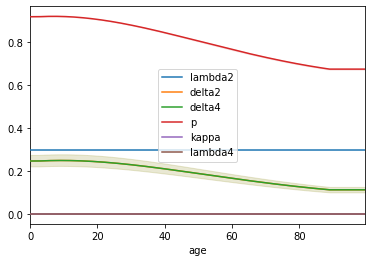

In [11]:
vis.plot_parameter(pe,errors,log=False)
plt.legend()
plt.show()

In [ ]:
%debug

In [10]:
op.calc_aicc(pe)

-178.4038391051777